In [ ]:
import numpy as np
import pandas as pd
import scipy as sp               # Python library for numerical algorithms
from matplotlib import pyplot    # Python library for plotting data
import seaborn as sns            # Python library based on matplotlib
import missingno as msno
from ast import literal_eval

In [ ]:
hotel = pd.read_csv('Hotel_Reviews.csv')
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
hotel.shape
hotel.info()
hotel.isnull().sum()
hotel.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96880 entries, 0 to 96879
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               96880 non-null  object 
 1   Additional_Number_of_Scoring                96880 non-null  int64  
 2   Review_Date                                 96880 non-null  object 
 3   Average_Score                               96880 non-null  float64
 4   Hotel_Name                                  96880 non-null  object 
 5   Reviewer_Nationality                        96879 non-null  object 
 6   Negative_Review                             96879 non-null  object 
 7   Review_Total_Negative_Word_Counts           96879 non-null  float64
 8   Total_Number_of_Reviews                     96879 non-null  float64
 9   Positive_Review                             96879 non-null  object 
 10  Review_Tot

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,96880.000000,96880.000000,96879.000000,96879.000000,96879.000000,96879.000000,96879.000000,96879.000000,96879.000000
mean,598.902808,8.384270,18.621414,2510.566800,17.338484,6.550935,8.372674,50.986257,0.377605
std,611.534169,0.598943,29.431808,2141.742658,20.990301,10.258891,1.668992,1.061045,1.027887
min,5.000000,6.800000,0.000000,45.000000,0.000000,1.000000,2.500000,48.817808,-0.319292
25%,194.000000,8.000000,2.000000,998.000000,5.000000,1.000000,7.500000,51.491959,-0.170307
50%,421.000000,8.400000,9.000000,2007.000000,11.000000,3.000000,8.800000,51.502485,-0.125160
75%,728.000000,8.900000,24.000000,2903.000000,22.000000,8.000000,9.600000,51.515632,-0.013746
max,2682.000000,9.800000,401.000000,9086.000000,383.000000,315.000000,10.000000,52.360576,4.915968


In [ ]:
hotel.Hotel_Address = hotel.Hotel_Address.str.replace("United Kingdom", "UnitedKingdom")
hotel["countries"] = hotel.Hotel_Address.apply(lambda x: x.split(' ')[-1])
print(hotel.countries.unique())
hotel.duplicated().sum()
hotel['countries'] = hotel['countries'].str.lower()
hotel['Tags'] = hotel['Tags'].str.lower()
hotel['Tags'][2]

['Netherlands' 'UnitedKingdom' 'France']


"[' leisure trip ', ' family with young children ', ' duplex double room ', ' stayed 3 nights ', ' submitted from a mobile device ']"

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
hotel.describe(include='all')

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,countries
count,96880,96880.000000,96880,96880.000000,96880,96879,96879,96879.000000,96879.000000,96879,96879.000000,96879.000000,96879.000000,96879,96879,96879.000000,96879.000000,96880
unique,277,NaN,731,NaN,278,195,64050,NaN,NaN,79822,NaN,NaN,NaN,14312,731,NaN,NaN,3
top,163 Marsh Wall Docklands Tower Hamlets London ...,NaN,8/2/2017,NaN,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,NaN,NaN,No Positive,NaN,NaN,NaN,"[' leisure trip ', ' couple ', ' superior doub...",1 days,NaN,NaN,unitedkingdom
freq,4789,NaN,630,NaN,4789,54453,23532,NaN,NaN,7020,NaN,NaN,NaN,1588,630,NaN,NaN,77181
mean,NaN,598.902808,NaN,8.384270,NaN,NaN,NaN,18.621414,2510.566800,NaN,17.338484,6.550935,8.372674,NaN,NaN,50.986257,0.377605,NaN
std,NaN,611.534169,NaN,0.598943,NaN,NaN,NaN,29.431808,2141.742658,NaN,20.990301,10.258891,1.668992,NaN,NaN,1.061045,1.027887,NaN
min,NaN,5.000000,NaN,6.800000,NaN,NaN,NaN,0.000000,45.000000,NaN,0.000000,1.000000,2.500000,NaN,NaN,48.817808,-0.319292,NaN
25%,NaN,194.000000,NaN,8.000000,NaN,NaN,NaN,2.000000,998.000000,NaN,5.000000,1.000000,7.500000,NaN,NaN,51.491959,-0.170307,NaN
50%,NaN,421.000000,NaN,8.400000,NaN,NaN,NaN,9.000000,2007.000000,NaN,11.000000,3.000000,8.800000,NaN,NaN,51.502485,-0.125160,NaN
75%,NaN,728.000000,NaN,8.900000,NaN,NaN,NaN,24.000000,2903.000000,NaN,22.000000,8.000000,9.600000,NaN,NaN,51.515632,-0.013746,NaN


33


<Axes: >

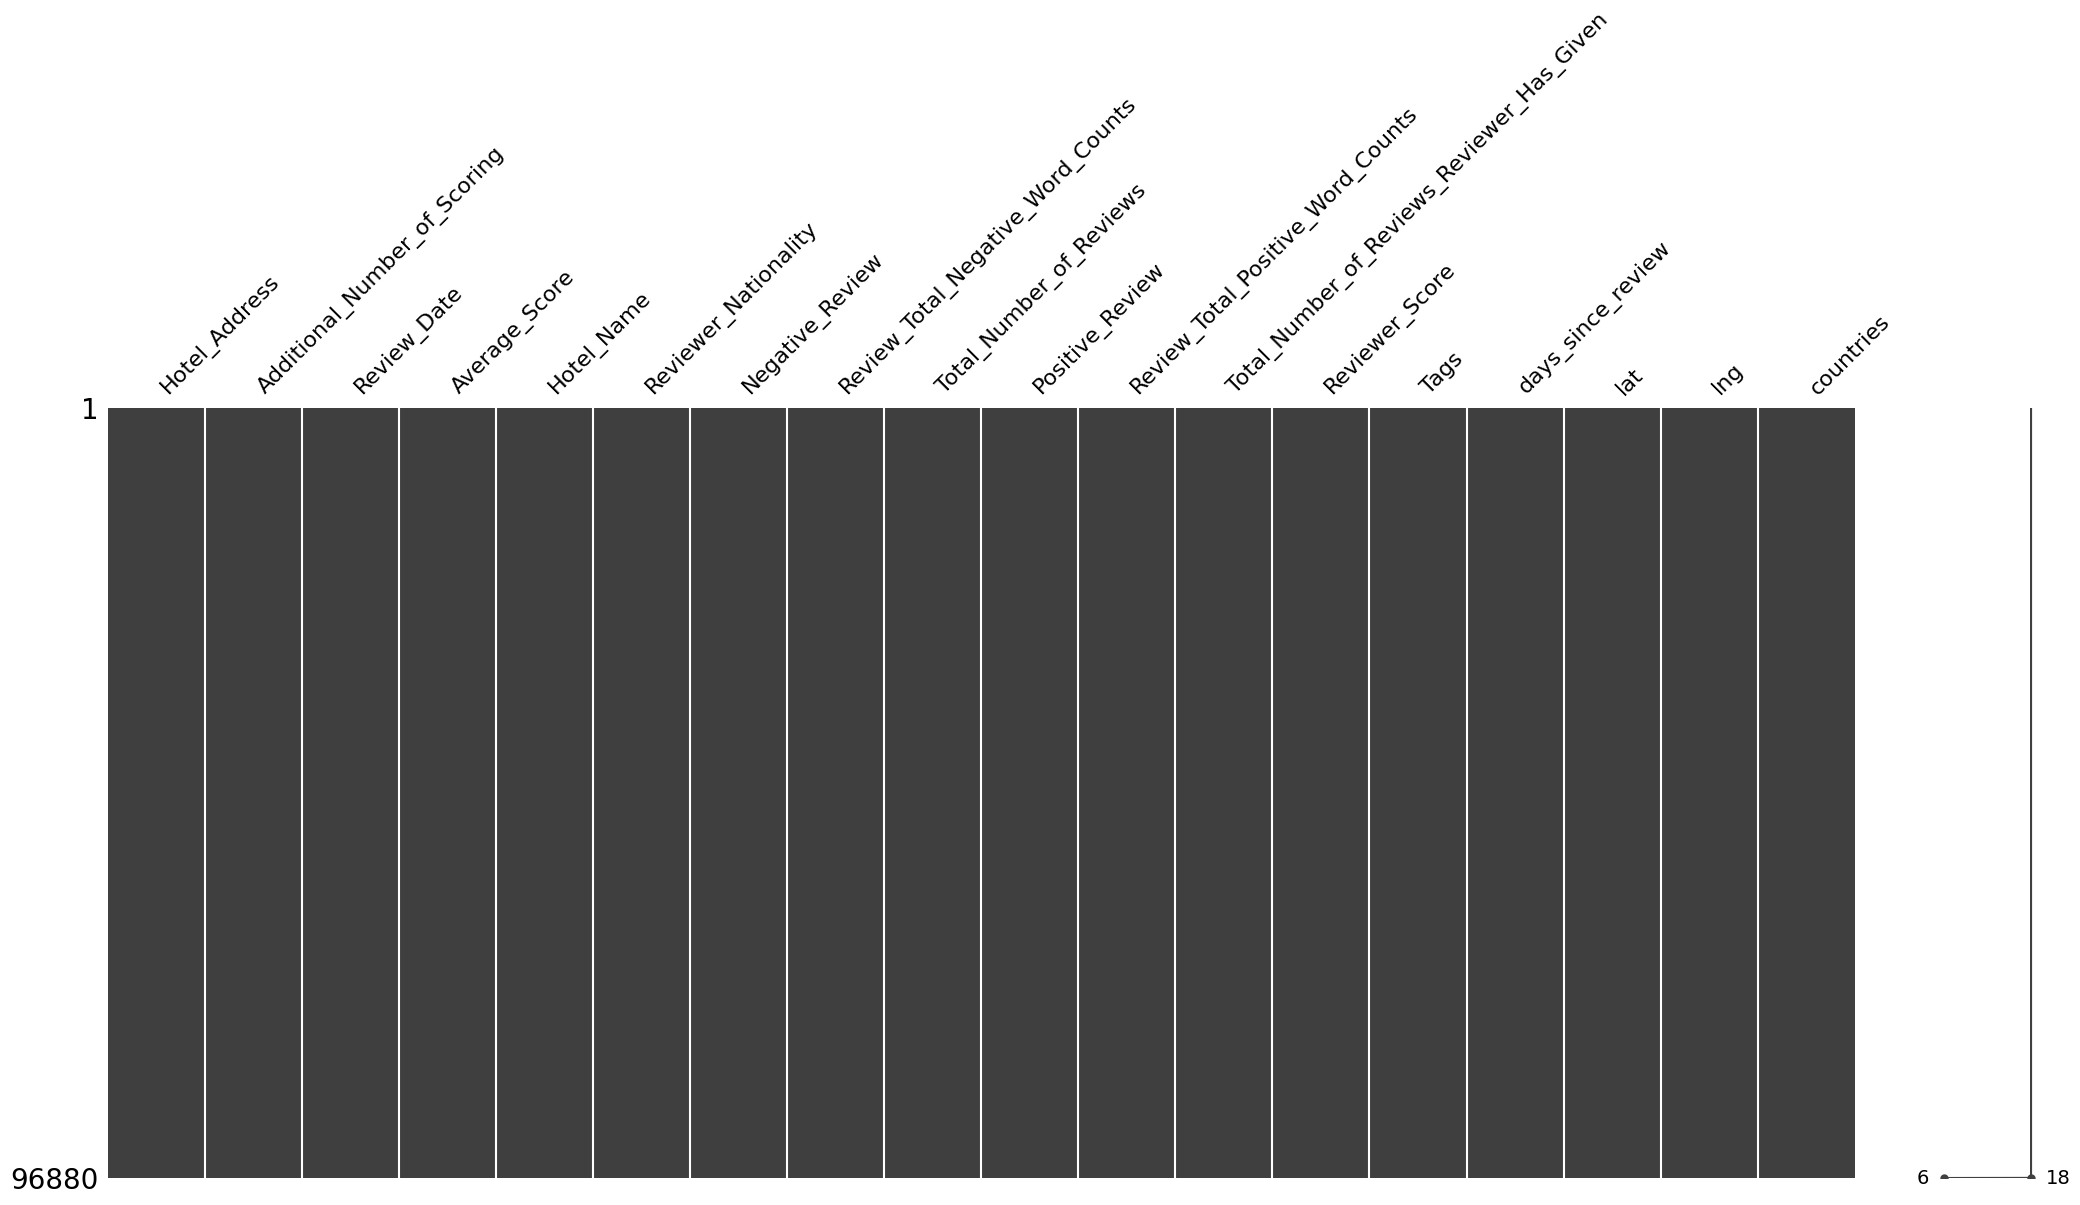

In [ ]:
print(sum(hotel.duplicated()))
msno.matrix(hotel)

In [ ]:
hotel = hotel.drop_duplicates()

print(sum(hotel.duplicated()))
hotel = hotel.dropna()
hotel.describe()

0


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,96846.000000,96846.000000,96846.000000,96846.000000,96846.000000,96846.000000,96846.000000,96846.000000,96846.000000
mean,599.090628,8.384758,18.620129,2511.323792,17.340954,6.550937,8.373452,50.986917,0.376996
std,611.549780,0.598367,29.433692,2141.691442,20.991873,10.259204,1.668215,1.060558,1.027475
min,5.000000,6.800000,0.000000,45.000000,0.000000,1.000000,2.500000,48.817808,-0.319292
25%,194.000000,8.000000,2.000000,998.000000,5.000000,1.000000,7.500000,51.491959,-0.170307
50%,421.000000,8.400000,9.000000,2007.000000,11.000000,3.000000,8.800000,51.502485,-0.125160
75%,728.000000,8.900000,24.000000,2903.000000,22.000000,8.000000,9.600000,51.515632,-0.015730
max,2682.000000,9.800000,401.000000,9086.000000,383.000000,315.000000,10.000000,52.360576,4.915968


<Axes: xlabel='Average_Score', ylabel='count'>

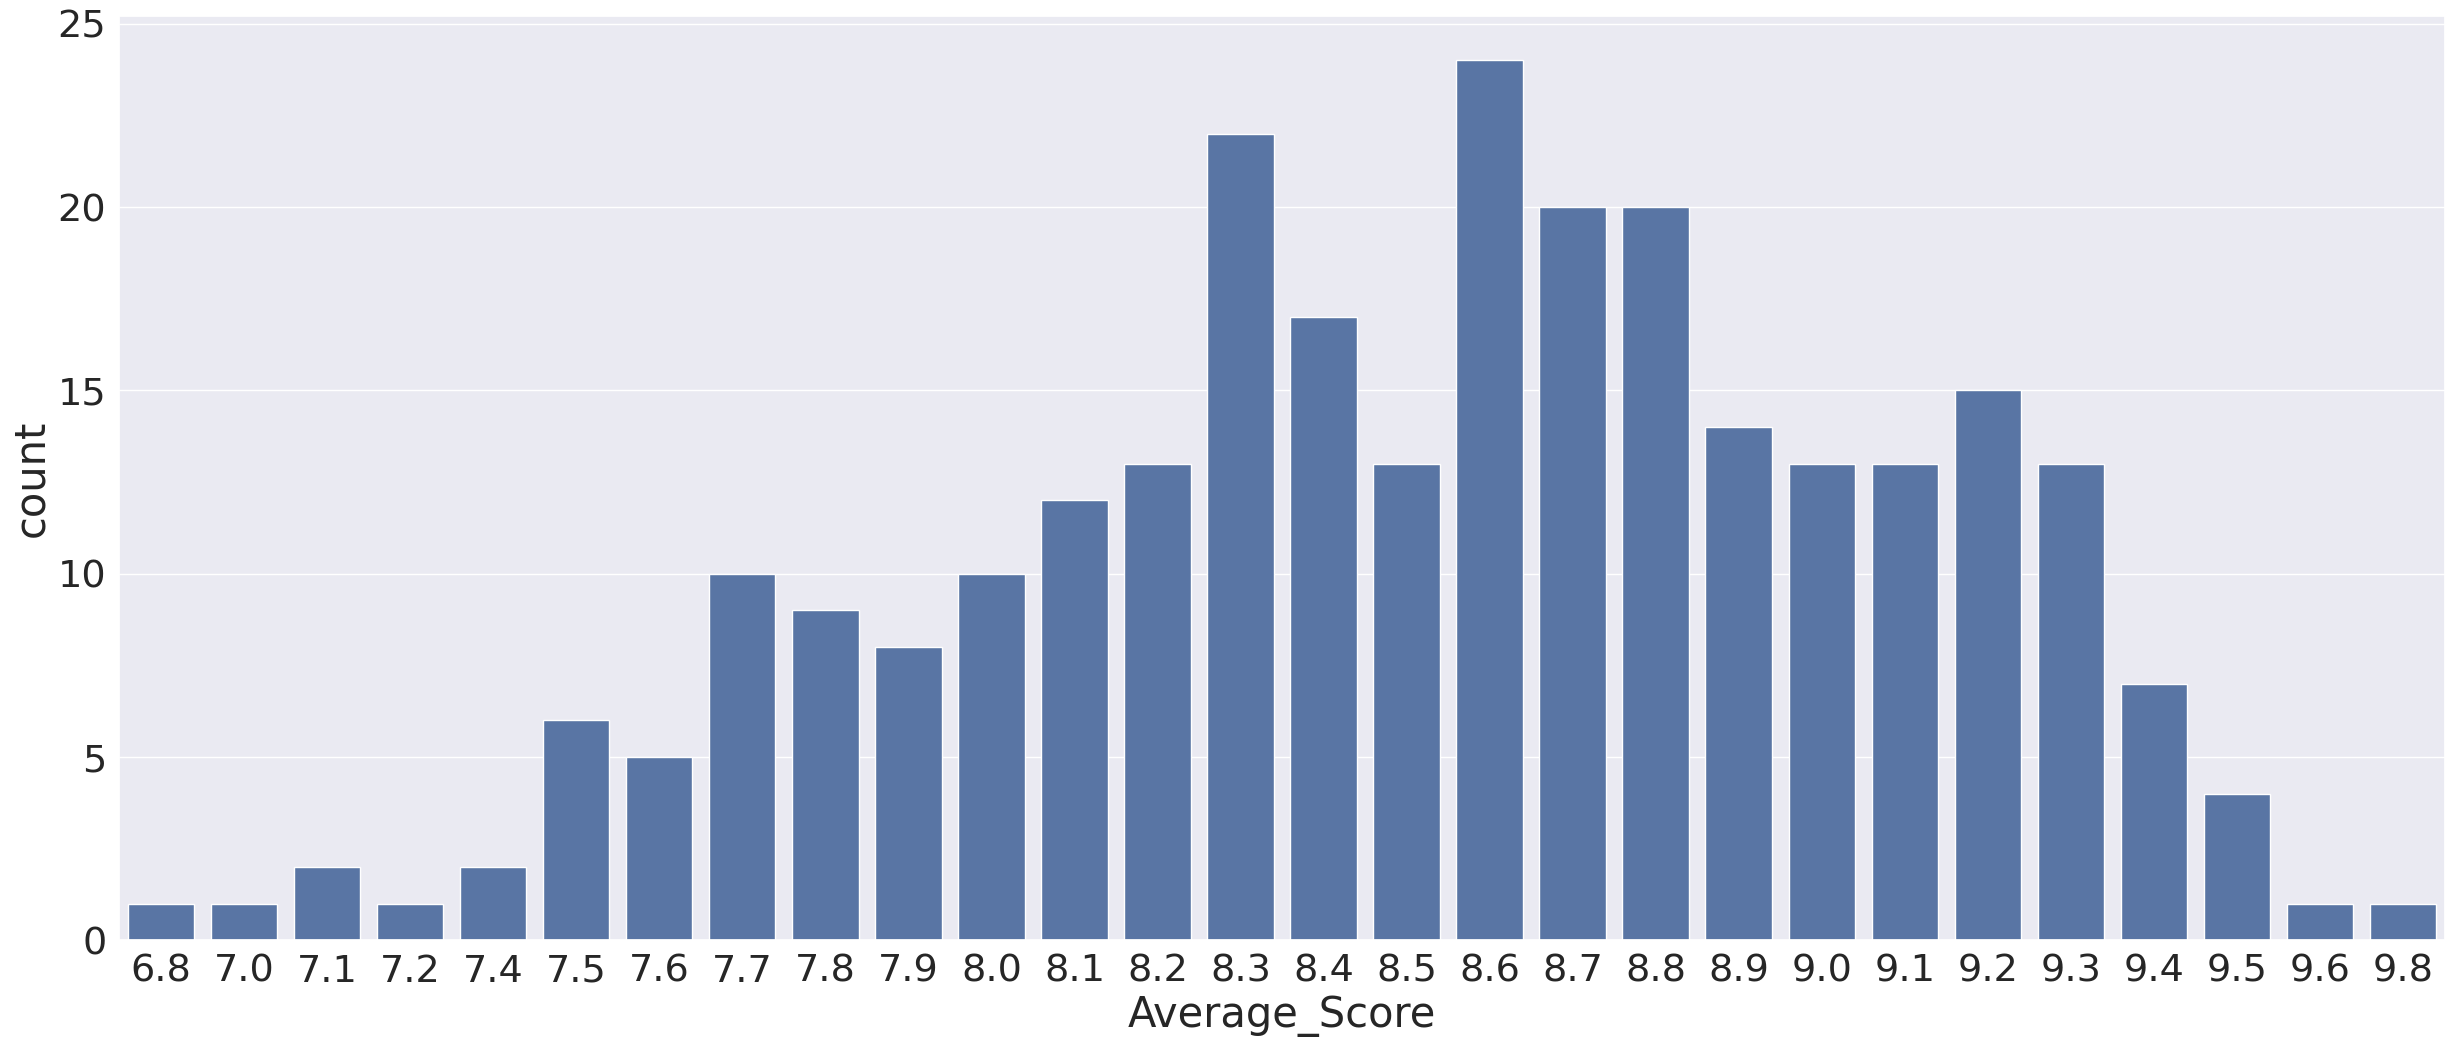

In [ ]:
Review_plot = hotel[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=Review_plot)

<Axes: xlabel='Hotel_Name'>

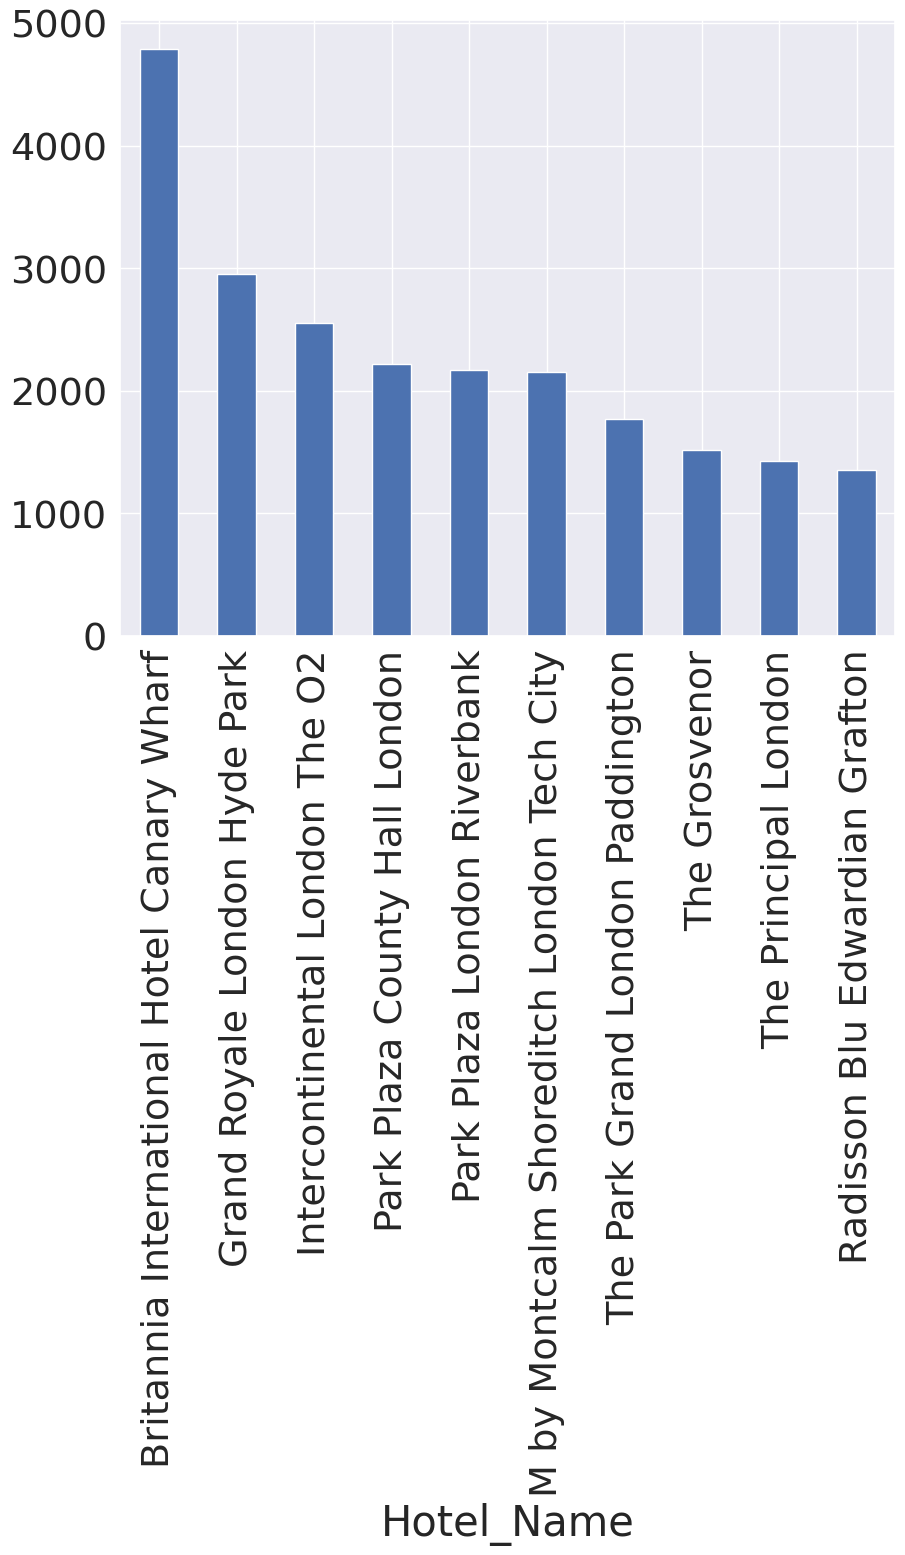

In [ ]:

Hotel_counts = hotel.Hotel_Name.value_counts()
Hotel_counts[:10].plot(kind='bar',figsize=(10,8))

<Axes: xlabel='Review_Date'>

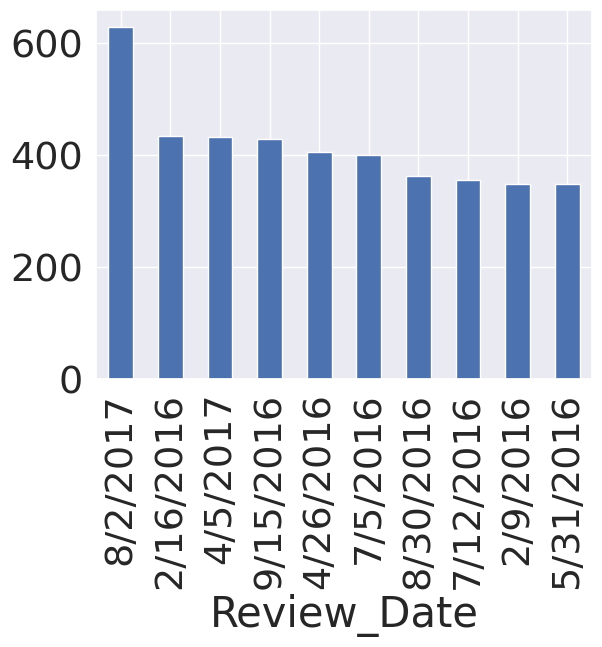

In [ ]:
Review_Date_count = hotel.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load Dataset
df = pd.read_csv('Hotel_Reviews.csv')

# Step 3: Select Features and Create Labels
# We'll predict whether the reviewer gave a high rating (label 1) or not (label 0)
features = [
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given'
]

df = df[features + ['Reviewer_Score']].dropna()
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)

# Step 4: Prepare Data
X = df[features].values
y = df['Label'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Step 8: Display Results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")



Accuracy:  0.8131
Precision: 0.8569
Recall:    0.9131
F1 Score:  0.8841


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack

# Step 2: Load Dataset
df = pd.read_csv('Hotel_Reviews.csv')

# Step 3: Preprocess and Create Label
df = df[[
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Positive_Review',
    'Negative_Review',
    'Reviewer_Score'
]].dropna()

# Binary label: Recommend (1) if score >= 7.5
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)

# Step 4: Text Vectorization (TF-IDF)
# Combine positive and negative reviews into one text field
df['Review_Text'] = df['Positive_Review'] + " " + df['Negative_Review']

# Limit vocabulary size for performance
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['Review_Text'])

# Step 5: Normalize Numerical Features
numeric_features = [
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given'
]

scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[numeric_features])

# Step 6: Combine Text and Numeric Features
X_combined = hstack([X_text, X_numeric])
y = df['Label'].values

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Step 8: Train SVM Model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Step 10: Display Results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")



Accuracy:  0.78 
Precision: 0.80
Recall:    0.76
F1 Score:  0.78


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.sparse import hstack
import xgboost as xgb

# Step 2: Load Dataset
df = pd.read_csv('Hotel_Reviews.csv')

# Step 3: Preprocess Data
df = df[[
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Positive_Review',
    'Negative_Review',
    'Reviewer_Score'
]].dropna()

# Binary label: Recommend if Reviewer_Score >= 7.5
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)

# Step 4: Combine and Vectorize Text Reviews
df['Review_Text'] = df['Positive_Review'] + " " + df['Negative_Review']
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['Review_Text'])

# Step 5: Normalize Numerical Features
numeric_features = [
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given'
]
scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[numeric_features])

# Step 6: Combine Features
X = hstack([X_text, X_numeric])
y = df['Label'].values

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=6, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 10: Display Results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")



Accuracy:  0.86
Precision: 0.88
Recall:    0.84
F1 Score:  0.86


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import class_weight
from scipy.sparse import hstack

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Load Dataset
df = pd.read_csv('Hotel_Reviews.csv')

# Step 3: Preprocess Data
df = df[[
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Positive_Review',
    'Negative_Review',
    'Reviewer_Score'
]].dropna()

# Binary label: Recommend (1) if Reviewer_Score >= 7.5
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)

# Step 4: Combine and Vectorize Text
df['Review_Text'] = df['Positive_Review'] + " " + df['Negative_Review']
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['Review_Text'])

# Step 5: Scale Numerical Features
numeric_features = [
    'Average_Score',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given'
]

scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[numeric_features])

# Step 6: Combine All Features
from scipy.sparse import csr_matrix
X_combined = hstack([X_text, csr_matrix(X_numeric)])  # keep sparse format
y = df['Label'].values

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Convert sparse matrix to dense (required for TensorFlow)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Step 8: Build ANN Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_dense.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Train ANN Model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(X_train_dense, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Step 10: Evaluate
y_pred_prob = model.predict(X_test_dense).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Step 11: Print Results
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")



Accuracy:  0.90
Precision: 0.87
Recall:    0.84
F1 Score:  0.85


In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 2: Load Dataset
df = pd.read_csv("/mnt/data/Hotel_Reviews.csv")
df = df[['Positive_Review', 'Negative_Review', 'Reviewer_Score']].dropna()
df['Review_Text'] = df['Positive_Review'] + " " + df['Negative_Review']
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)  # 1 = recommended, 0 = not recommended

# Step 3: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Review_Text']).toarray()
y = df['Label'].values

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n Random Forest Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1 Score :  {f1:.4f}")





 Random Forest Evaluation Metrics:
Accuracy :  0.82
Precision:  0.83
Recall   :  0.81
F1 Score :  0.82



 Training History Table (HOA + LSTM):
+----+---------+---------+------------+--------+-----------------+-------------+
|    |   S.No. | Epoch   |   Accuracy |   Loss |   Val. Accuracy |   Val. Loss |
+====+=========+=========+============+========+=================+=============+
|  0 |       1 | 1/5     |     0.7581 | 0.6529 |          0.8095 |      0.4413 |
+----+---------+---------+------------+--------+-----------------+-------------+
|  1 |       2 | 2/5     |     0.8667 | 0.3821 |          0.8843 |      0.3705 |
+----+---------+---------+------------+--------+-----------------+-------------+
|  2 |       3 | 3/5     |     0.8821 | 0.3342 |          0.9364 |      0.3097 |
+----+---------+---------+------------+--------+-----------------+-------------+
|  3 |       4 | 4/5     |     0.9461 | 0.3074 |          0.9389 |      0.3065 |
+----+---------+---------+------------+--------+-----------------+-------------+
|  4 |       5 | 5/5     |     0.9769 | 0.283  |          0.9397 |    

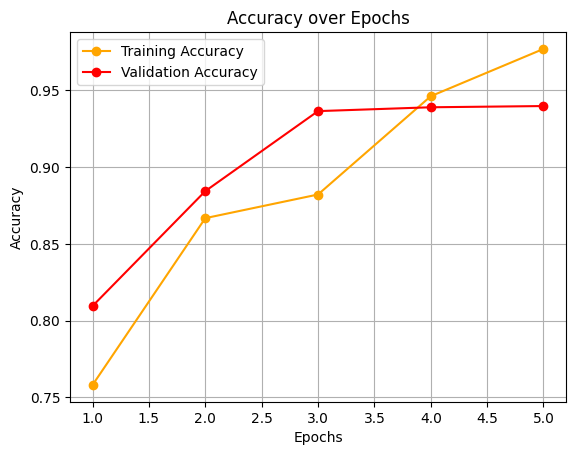

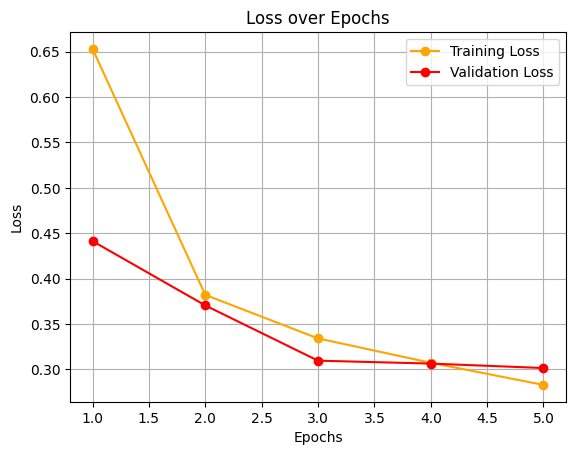

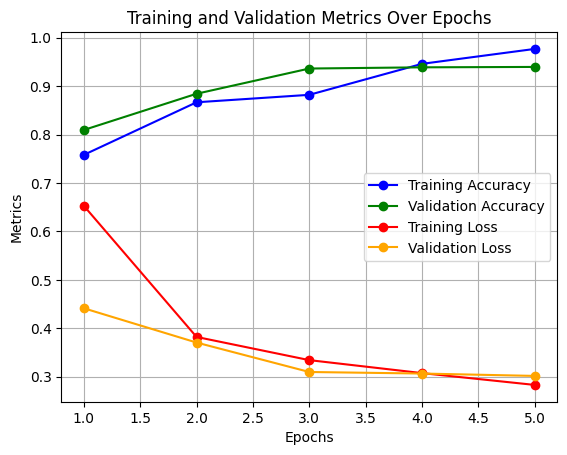

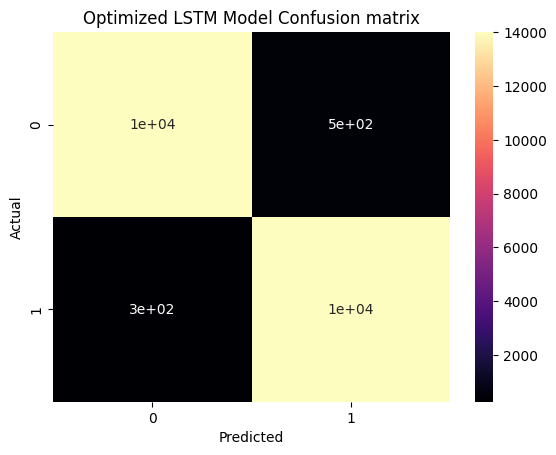


Model Comparison Table:
        Model  Accuracy  Precision  Recall  F1 Score
          KNN    0.7200     0.7400  0.7000    0.7200
          SVM    0.7800     0.8000  0.7600    0.7800
      XGBoost    0.8600     0.8800  0.8400    0.8600
Random Forest    0.8200     0.8300  0.8100    0.8200
          ANN    0.9000     0.8700  0.8400    0.8500
     LSTM+HOA    0.9321     0.9223  0.9565    0.9365


In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Load Data
df = pd.read_csv('Hotel_Reviews.csv')
df = df[['Positive_Review', 'Negative_Review', 'Reviewer_Score']].dropna()
df['Review_Text'] = df['Positive_Review'] + " " + df['Negative_Review']
df['Label'] = (df['Reviewer_Score'] >= 7.5).astype(int)

# Step 3: Text Tokenization
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review_Text'])
sequences = tokenizer.texts_to_sequences(df['Review_Text'])
X = pad_sequences(sequences, maxlen=max_len)
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define HOA
class HOA:
    def __init__(self, obj_function, bounds, pop_size=4, epochs=5):
        self.obj_function = obj_function
        self.bounds = bounds
        self.pop_size = pop_size
        self.epochs = epochs

    def optimize(self):
        pop = [self._init_solution() for _ in range(self.pop_size)]
        scores = [self.obj_function(p) for p in pop]
        best_idx = np.argmin(scores)
        best = pop[best_idx]

        for epoch in range(self.epochs):
            for i in range(self.pop_size):
                new = self._perturb(pop[i], best)
                new_score = self.obj_function(new)
                if new_score < scores[i]:
                    pop[i], scores[i] = new, new_score
                    if new_score < scores[best_idx]:
                        best, best_idx = new, i
        return best, -scores[best_idx]

    def _init_solution(self):
        return {k: random.uniform(v[0], v[1]) for k, v in self.bounds.items()}

    def _perturb(self, current, best):
        perturbed = {}
        for k in current:
            r = random.random()
            perturbed[k] = current[k] + r * (best[k] - current[k])
            perturbed[k] = max(self.bounds[k][0], min(self.bounds[k][1], perturbed[k]))
        return perturbed

# Step 5: Define Objective Function
def objective_function(params):
    lstm_units = int(params['units'])
    dropout_rate = float(params['dropout'])
    lr = float(params['lr'])

    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=0, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, callbacks=[early_stop], verbose=0)

    y_pred = (model.predict(X_test, verbose=0).ravel() >= 0.5).astype(int)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    return -f1  # minimize negative F1

# Step 6: Hyperparameter Bounds
param_bounds = {
    'units': (32, 128),
    'dropout': (0.2, 0.5),
    'lr': (0.0005, 0.01)
}

# Step 7: Run HOA Optimization
optimizer = HOA(obj_function=objective_function, bounds=param_bounds, pop_size=4, epochs=5)
best_params, best_f1 = optimizer.optimize()

print("\nBest Hyperparameters Found by HOA:")
print(best_params)

# Step 8: Final Model with Best Hyperparameters
final_model = Sequential()
final_model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
final_model.add(LSTM(int(best_params['units'])))
final_model.add(Dropout(float(best_params['dropout'])))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer=Adam(learning_rate=float(best_params['lr'])), loss='binary_crossentropy', metrics=['accuracy'])

final_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Step 9: Evaluate Final Model
y_pred_final = (final_model.predict(X_test, verbose=0).ravel() >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final, zero_division=0)
recall = recall_score(y_test, y_pred_final, zero_division=0)
f1 = f1_score(y_test, y_pred_final, zero_division=0)
